In [1]:
import time     
import os         

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline

df = pd.read_csv('all_new_pages.csv')
df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,price,year built,sqft,beds,bathroom,price_sqft,Property_Type,grage,HOA Fees,Address,Time On Web,sqft lot
0,0,0.0,0,0,"$330,000",1920.0,"2,600",7,3,$127,Multi-Family,2 cars,NaN,"8034 S Aberdeen St, Chicago, IL 60620",3 Hours,"3,920"
1,1,1.0,1,1,"$159,000",1885.0,"3,000",3,1.5,$53,Single Family,2 cars,NaN,"712 W 48th St, Chicago, IL 60609",17 Hours,NaN
2,2,2.0,2,2,"$249,500",1885.0,"1,512",3,2.5,$165,Single Family,2 cars,NaN,"1321 S Christiana Ave, Chicago, IL 60623",19 Hours,"3,125"
3,3,3.0,3,3,"$399,000",NaN,"3,738",6,3,$107,Single Family,2 cars,NaN,"1233 W 95th Pl, Chicago, IL 60643",21 Hours,NaN
4,4,4.0,4,4,"$795,000",2023.0,NaN,3,3.5,NaN,Townhome,2 cars,$288/mo,"4154 W Cullom Ave, Chicago, IL 60641",23 Hours,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,5453,NaN,454,37,"$169,000",NaN,NaN,5,2,NaN,Multi-Family,NaN,NaN,"2604 W 82nd St, Chicago, IL 60652",237 Days,"6,250"
5454,5454,NaN,455,38,"$97,950",1944.0,"1,196",3,1.5,$82,Single Family,NaN,NaN,"9942 S Luella Ave, Chicago, IL 60617",96 Days,"4,961"
5455,5455,NaN,456,39,"$205,000",1880.0,"1,088",2,1.5,$188,Single Family,1 car,NaN,"11345 S Champlain Ave, Chicago, IL 60628",59 Days,"1,984"
5456,5456,NaN,457,40,"$224,900",1915.0,NaN,9,4,NaN,Multi-Family,NaN,NaN,"6801 S Calumet Ave, Chicago, IL 60637",233 Days,"3,485"


In [2]:
df.head(10)

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,price,year built,sqft,beds,bathroom,price_sqft,Property_Type,grage,HOA Fees,Address,Time On Web,sqft lot
0,0,0.0,0,0,"$330,000",1920.0,"2,600",7,3,$127,Multi-Family,2 cars,NaN,"8034 S Aberdeen St, Chicago, IL 60620",3 Hours,"3,920"
1,1,1.0,1,1,"$159,000",1885.0,"3,000",3,1.5,$53,Single Family,2 cars,NaN,"712 W 48th St, Chicago, IL 60609",17 Hours,NaN
2,2,2.0,2,2,"$249,500",1885.0,"1,512",3,2.5,$165,Single Family,2 cars,NaN,"1321 S Christiana Ave, Chicago, IL 60623",19 Hours,"3,125"
3,3,3.0,3,3,"$399,000",NaN,"3,738",6,3,$107,Single Family,2 cars,NaN,"1233 W 95th Pl, Chicago, IL 60643",21 Hours,NaN
4,4,4.0,4,4,"$795,000",2023.0,NaN,3,3.5,NaN,Townhome,2 cars,$288/mo,"4154 W Cullom Ave, Chicago, IL 60641",23 Hours,NaN
5,5,5.0,5,5,"$20,000",1911.0,"1,100",2,1,$18,Single Family,NaN,NaN,"4111 W Washington Blvd, Chicago, IL 60624",1 Day,NaN
6,6,6.0,6,6,"$1,100,000",2023.0,"3,400",5,3.5,$324,Single Family,2 cars,NaN,"1239 N Campbell Ave, Chicago, IL 60622",1 Day,"3,165"
7,7,7.0,7,7,"$128,250",1942.0,"1,520",4,2,$84,Single Family,1 car,NaN,"10119 S Saint Lawrence Ave, Chicago, IL 60628",1 Day,"3,751"
8,8,8.0,8,8,"$79,000",1973.0,575,Studio,1,$137,Condo,NaN,$316/mo,"3001 S Michigan Ave Unit 1606, Chicago, IL 60616",1 Day,NaN
9,9,9.0,9,9,"$325,000",1925.0,NaN,6,3,NaN,Multi-Family,2 cars,NaN,"5028 W Adams St, Chicago, IL 60644",1 Day,"3,125"


In [3]:
df['Property_Type'].unique()


array(['Multi-Family', 'Single Family', 'Townhome', 'Condo', 'Land'],
      dtype=object)

In [4]:
df2 = df.copy()
df2.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2', 'Unnamed: 0.3'] , axis = 1,inplace = True)
#הורדנו 580 שורות כפולות 
df2.drop_duplicates(inplace = True)
#הורדנו 32 שורות שאנחנו לא יודעים את המחיר 
df2.drop(df2.loc[df2['price']=='Contact For Price'].index, inplace=True)
#דירת סטודיו ולכן יש חדר אחד ולכן נחליף את סטודיו ב 1 
df2.replace(to_replace = "Studio", value = "1", inplace = True) 

#טיפול בנתונים מפכנו עמודות לנומריות הורדנו פסיקים דולר וכו..
df2['beds']=pd.to_numeric(df2['beds'])

df2['bathroom'] = df2['bathroom'].str.replace('+', '',regex=True)
df2['bathroom']=pd.to_numeric(df2['bathroom'])

df2['price'] = df2['price'].str.replace('$', '',regex=True).str.replace(',', '',regex=True)
df2['price']=pd.to_numeric(df2['price'])

df2['sqft'] = df2['sqft'].str.replace(',', '',regex=True)
df2['sqft']=pd.to_numeric(df2['sqft']) 

df2['price_sqft'] = df2['price_sqft'].str.replace('$', '',regex=True)
df2['price_sqft']=pd.to_numeric(df2['price_sqft']) 

df2['grage'] = df2['grage'].str.replace(' cars', '',regex=True)
df2['grage'] = df2['grage'].str.replace(' car', '',regex=True)
df2['grage']=df2['grage'].fillna(0)
df2['grage']=pd.to_numeric(df2['grage'])

df2['HOA Fees'] = df2['HOA Fees'].str.replace('/mo', '',regex=True).str.replace('$', '',regex=True)
df2['HOA Fees']=pd.to_numeric(df2['HOA Fees']) 

#עשינו לולאה שמחליפה את הזמן באתר ומכיוון שהיו עמודות בודדות שבהן הערך היה קטן מימים החלפנו את הערך ליום אחד 
for index, row in df2.iterrows():
    if 'Hours' in row['Time On Web']:
        df2.loc[index, 'Time On Web'] = '1'
    if 'Hour' in row ['Time On Web']:
        df2.loc[index, 'Time On Web'] = '1'
    if 'Minutes' in row ['Time On Web']:
        df2.loc[index, 'Time On Web'] = '1'

        
df2['Time On Web']= df2['Time On Web'].str.replace(' Days', '',regex=True)
df2['Time On Web']= df2['Time On Web'].str.replace(' Day', '',regex=True)
df2['Time On Web']=pd.to_numeric(df2['Time On Web']) 

df2['sqft lot'] = df2['sqft lot'].str.replace(',', '',regex=True)
df2['sqft lot']=pd.to_numeric(df2['sqft lot'])
# כל דירה שנקראת קונדו היא דירה בבניין מגורים ואין בה שטח הכולל חצר או חניה וכדומה ,לכן שמנו את שטח הדירה כשטח הדירה הכולל בעמודה החסרה 
for index, row in df2.iterrows():
    if row["Property_Type"]=='Condo':
            if(pd.notnull(row['sqft'])):
                df2.loc[index ,'sqft lot'] = row['sqft']
                
df2_object = pd.get_dummies(df2['Property_Type'])
df_final = df2.join(df2_object)
df_final.drop(columns=['Property_Type'],inplace=True)
df2 = df_final.copy()

# df2["Property_Type"]=LabelEncoder().fit_transform(df2['Property_Type'])


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 5457
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4840 non-null   int64  
 1   year built     4348 non-null   float64
 2   sqft           3520 non-null   float64
 3   beds           4768 non-null   float64
 4   bathroom       4761 non-null   float64
 5   price_sqft     3520 non-null   float64
 6   grage          4840 non-null   int64  
 7   HOA Fees       2189 non-null   float64
 8   Address        4840 non-null   object 
 9   Time On Web    4840 non-null   int64  
 10  sqft lot       3860 non-null   float64
 11  Condo          4840 non-null   uint8  
 12  Land           4840 non-null   uint8  
 13  Multi-Family   4840 non-null   uint8  
 14  Single Family  4840 non-null   uint8  
 15  Townhome       4840 non-null   uint8  
dtypes: float64(7), int64(3), object(1), uint8(5)
memory usage: 606.4+ KB


In [6]:
#מילאנו 1736 שורות בארנונה  על ידי כך שיצרנו מילון בו המפתחות הם המיקוד והערכים הם הארנונה לאחר מכן חיפשנו את שורות שבהן לא קיימת ארנונה ולפי המיקוד בדקנו אם קיים במילון 
#אם קיים עדכנו את ערכו , היה ניתן לראות שבאזורים עם מיקוד זהה הארנונה זהה 
zip_dict = {}

for index, row in df2.iterrows():
    if(pd.notnull(row['HOA Fees'])):
        address = row['Address']
        zipcode = int(address[-5:])
        if(zipcode not in zip_dict ):
            zip_dict[zipcode]=row['HOA Fees']
print(zip_dict)            
for index, row in df2.iterrows():
    if(pd.isnull(row['HOA Fees'])):
        address = row['Address']
        zipcode = int(address[-5:]) 
        for i in zip_dict.keys():
            if(zipcode == i):
                df2.loc[index,'HOA Fees'] = zip_dict.get(zipcode)

{60641: 288.0, 60616: 316.0, 60661: 548.0, 60626: 320.0, 60615: 855.0, 60637: 898.0, 60601: 772.0, 60660: 1008.0, 60607: 378.0, 60647: 322.0, 60645: 350.0, 60611: 717.0, 60640: 550.0, 60606: 613.0, 60657: 292.0, 60610: 600.0, 60614: 471.0, 60649: 478.0, 60624: 267.0, 60622: 205.0, 60605: 1411.0, 60654: 874.0, 60618: 307.0, 60643: 244.0, 60642: 211.0, 60608: 120.0, 60603: 2328.0, 60659: 348.0, 60656: 305.0, 60613: 300.0, 60653: 237.0, 60612: 300.0, 60625: 320.0, 60602: 1010.0, 60652: 368.0, 60638: 200.0, 60630: 288.0, 60604: 510.0, 60644: 175.0, 60623: 205.0, 60631: 250.0, 60634: 171.0, 60646: 400.0, 60655: 228.0, 60619: 17.0, 60651: 334.0, 60707: 221.0, 60609: 200.0, 60639: 160.0, 60617: 300.0, 60629: 125.0}


In [7]:
#  כלומר בתים באותה שכונה בערך נבנו באותה שנה ולכן בדקנו לפי המיקוד את המיקוד את הבתים שבאותו אזור ונתנו להם את שנת הבנייה  year built  נעשה אותו דבר עם עמודת ה 
zip_dict = {}

for index, row in df2.iterrows():
    if(pd.notnull(row['year built'])):
        address = row['Address']
        zipcode = int(address[-5:])
        if(zipcode not in zip_dict ):
            zip_dict[zipcode]=row['year built']
print(zip_dict)            
for index, row in df2.iterrows():
    if(pd.isnull(row['year built'])):
        address = row['Address']
        zipcode = int(address[-5:]) 
        for i in zip_dict.keys():
            if(zipcode == i):
                df2.loc[index,'year built'] = zip_dict.get(zipcode)
df2.info()

{60620: 1920.0, 60609: 1885.0, 60623: 1885.0, 60641: 2023.0, 60624: 1911.0, 60622: 2023.0, 60628: 1942.0, 60616: 1973.0, 60644: 1925.0, 60661: 2008.0, 60643: 1954.0, 60621: 1915.0, 60626: 1932.0, 60632: 1918.0, 60615: 1962.0, 60656: 2022.0, 60637: 1968.0, 60601: 2020.0, 60619: 1905.0, 60660: 1968.0, 60607: 2009.0, 60655: 1953.0, 60647: 2019.0, 60617: 1954.0, 60611: 2008.0, 60406: 1949.0, 60614: 1883.0, 60640: 1974.0, 60606: 1949.0, 60657: 1969.0, 60608: 1865.0, 60613: 2011.0, 60610: 1964.0, 60653: 2019.0, 60649: 1924.0, 60646: 1967.0, 60631: 1944.0, 60625: 1918.0, 60652: 1951.0, 60633: 1969.0, 60636: 1925.0, 60639: 1920.0, 60605: 1914.0, 60630: 1932.0, 60638: 1951.0, 60654: 1999.0, 60618: 2022.0, 60651: 1927.0, 60659: 1925.0, 60634: 1924.0, 60642: 2000.0, 60629: 1957.0, 60603: 2010.0, 60612: 1899.0, 60645: 1974.0, 60602: 2005.0, 60604: 1924.0, 60707: 1978.0, 60706: 1956.0}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 5457
Data columns (total 16 columns):
 #   Co

In [8]:
#שמנו את הגודל הכולל של הדירה בגודל הדירה במקרים שהיה בגודל הדירה ערך חסר 
for index, row in df2.iterrows():  
        if(pd.isnull(row['sqft'])):
            if(pd.notnull(row['sqft lot'])):
                df2.loc[index ,'sqft'] = row['sqft lot']

#במקומות שהיה חסר המחיר לפיט מרובע אז חישבנו את הפיט המרובע עבור כל מקום שהיה חסר בו ומילאנו 
for index, row in df2.iterrows():
    if(pd.isnull(row['price_sqft'])):
            if(pd.notnull(row['sqft'])):
                df2.loc[index ,'price_sqft'] = round(row["price"]/row['sqft'])

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 5457
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4840 non-null   int64  
 1   year built     4840 non-null   float64
 2   sqft           4190 non-null   float64
 3   beds           4768 non-null   float64
 4   bathroom       4761 non-null   float64
 5   price_sqft     4190 non-null   float64
 6   grage          4840 non-null   int64  
 7   HOA Fees       4208 non-null   float64
 8   Address        4840 non-null   object 
 9   Time On Web    4840 non-null   int64  
 10  sqft lot       3860 non-null   float64
 11  Condo          4840 non-null   uint8  
 12  Land           4840 non-null   uint8  
 13  Multi-Family   4840 non-null   uint8  
 14  Single Family  4840 non-null   uint8  
 15  Townhome       4840 non-null   uint8  
dtypes: float64(7), int64(3), object(1), uint8(5)
memory usage: 606.4+ KB


In [10]:
#כל השורות בהן חסר כמות האמבטיות ושורות שבהן שטח הדירה הכולל עדיין לא ידוע, גם לאחר התיקון שעשינו עבורו, מחקנו את שורות אלה 
df2.dropna(subset = ['bathroom'], axis = 0, inplace = True)
df2.dropna(subset = ['sqft lot'], axis = 0, inplace = True)

#את שאר הארנונה שנשאר מילאנו בממוצע 
HOA_Fees_mean = df2['HOA Fees'].mean()
df2['HOA Fees'].fillna(HOA_Fees_mean, inplace = True)

In [11]:

df2

,price,year built,sqft,beds,bathroom,price_sqft,grage,HOA Fees,Address,Time On Web,sqft lot,Condo,Land,Multi-Family,Single Family,Townhome
0,330000,1920.0,2600.0,7.0,3.0,127.0,2,551.138838,"8034 S Aberdeen St, Chicago, IL 60620",1,3920.0,0,0,1,0,0
2,249500,1885.0,1512.0,3.0,2.5,165.0,2,205.000000,"1321 S Christiana Ave, Chicago, IL 60623",1,3125.0,0,0,0,1,0
6,1100000,2023.0,3400.0,5.0,3.5,324.0,2,205.000000,"1239 N Campbell Ave, Chicago, IL 60622",1,3165.0,0,0,0,1,0
7,128250,1942.0,1520.0,4.0,2.0,84.0,1,551.138838,"10119 S Saint Lawrence Ave, Chicago, IL 60628",1,3751.0,0,0,0,1,0
8,79000,1973.0,575.0,1.0,1.0,137.0,0,316.000000,"3001 S Michigan Ave Unit 1606, Chicago, IL 60616",1,575.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,169000,1951.0,6250.0,5.0,2.0,27.0,0,368.000000,"2604 W 82nd St, Chicago, IL 60652",237,6250.0,0,0,1,0,0
5454,97950,1944.0,1196.0,3.0,1.5,82.0,0,300.000000,"9942 S Luella Ave, Chicago, IL 60617",96,4961.0,0,0,0,1,0
5455,205000,1880.0,1088.0,2.0,1.5,188.0,1,551.138838,"11345 S Champlain Ave, Chicago, IL 60628",59,1984.0,0,0,0,1,0
5456,224900,1915.0,3485.0,9.0,4.0,65.0,0,898.000000,"6801 S Calumet Ave, Chicago, IL 60637",233,3485.0,0,0,1,0,0


In [12]:
# נבדוק ערכים חריגים  ע"י יצרת גרפים אשר מראים לנו התפלגות לפי כמויות    
# ע"י גרפי היסט

C:\Users\User\AppData\Local\Temp\ipykernel_10836\2599963076.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df2.hist(ax=ax, figsize=(10,40))


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year built'}>,
        <AxesSubplot:title={'center':'sqft'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'bathroom'}>,
        <AxesSubplot:title={'center':'price_sqft'}>,
        <AxesSubplot:title={'center':'grage'}>,
        <AxesSubplot:title={'center':'HOA Fees'}>],
       [<AxesSubplot:title={'center':'Time On Web'}>,
        <AxesSubplot:title={'center':'sqft lot'}>,
        <AxesSubplot:title={'center':'Condo'}>,
        <AxesSubplot:title={'center':'Land'}>],
       [<AxesSubplot:title={'center':'Multi-Family'}>,
        <AxesSubplot:title={'center':'Single Family'}>,
        <AxesSubplot:title={'center':'Townhome'}>, <AxesSubplot:>]],
      dtype=object)

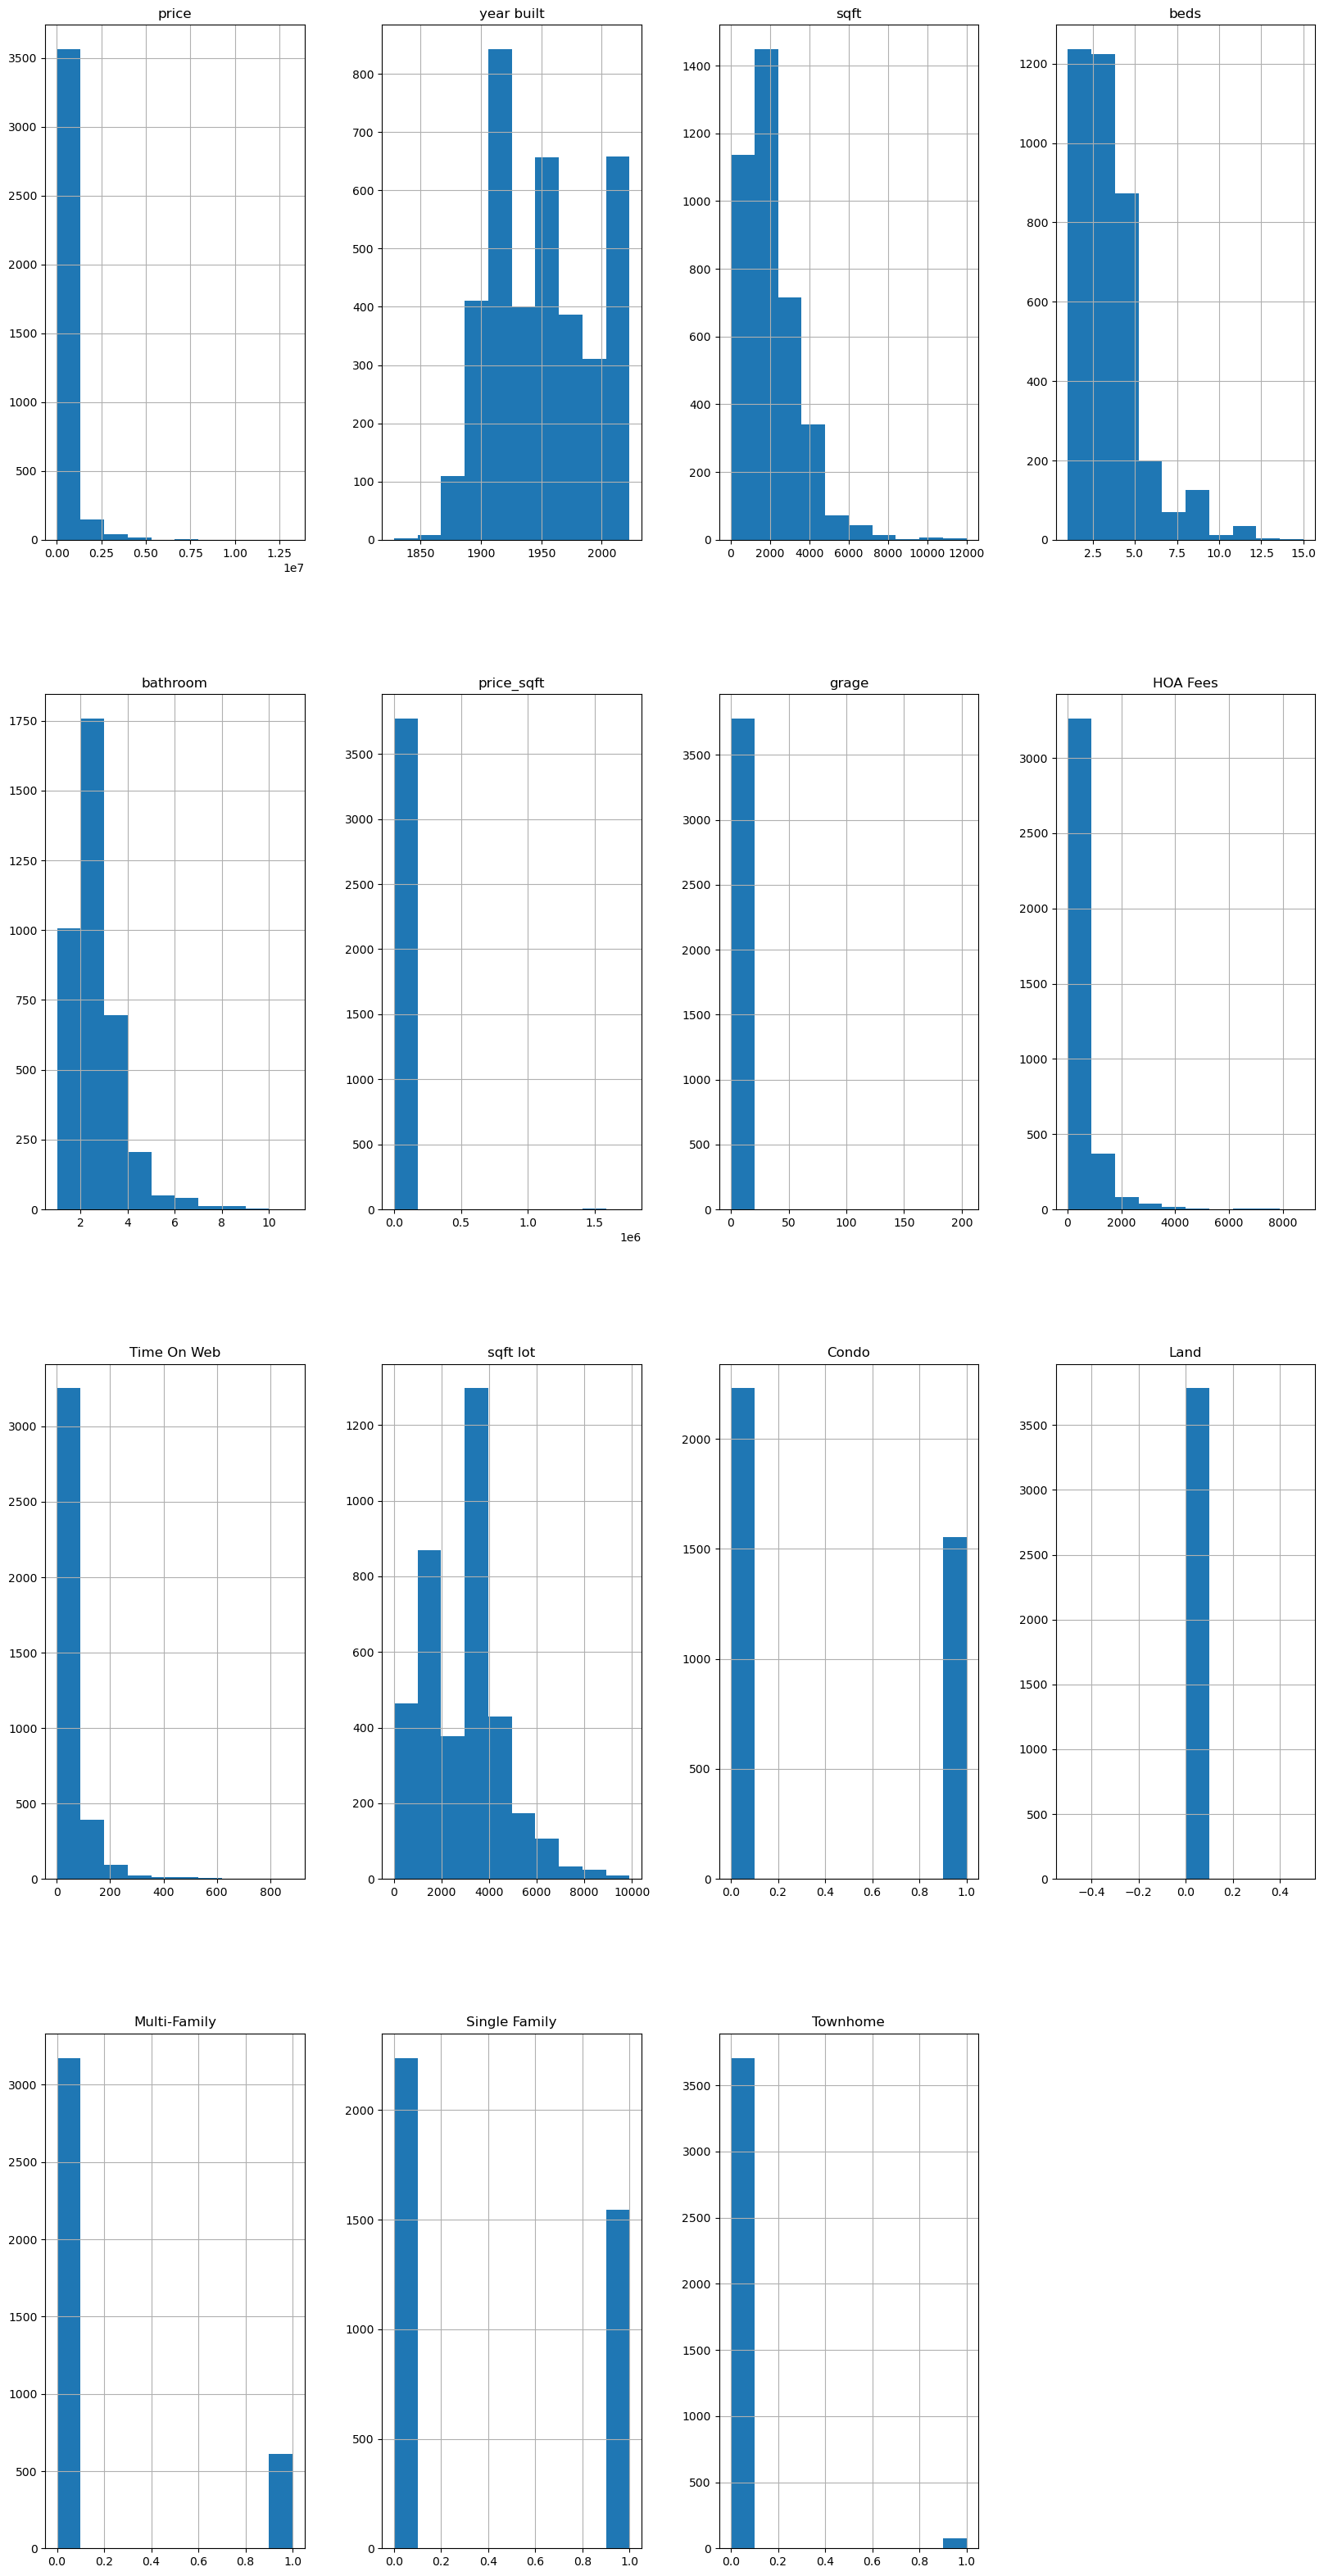

In [14]:
# נבדוק ערכים חריגים  ע"י יצרת גרפים אשר מראים לנו התפלגות לפי כמויות    
# ע"י גרפי היסט
fig, ax = plt.subplots(figsize=(20,40))
df2.hist(ax=ax, figsize=(10,40))

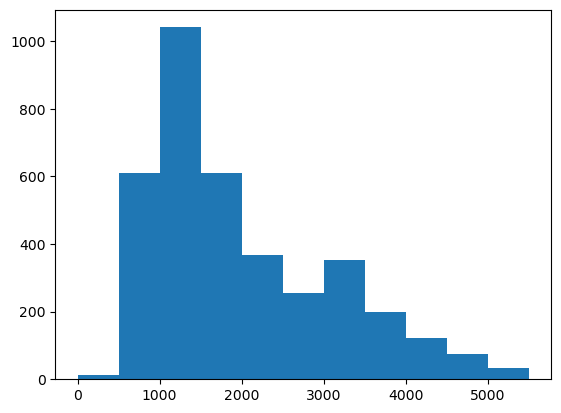

In [15]:
# קשה להבין את התפלגות הנתונים בעמודת המחיר לכן ציירנן את הגרך של עמודת המחיר בנפרד 
bins = []
for i in range (1,6000,500):
    bins.append(i)

plt.hist(df2['sqft'], bins)
plt.show()

In [16]:
#נמחק ערכים אשר הגדרנו כחריגים        
df2 = df2[(df2['price'] >= 50000) & (df2['price'] <= 600000)]      
df2 = df2[(df2['year built'] >=1885) & (df2['year built'] <= 2023)] 
df2 = df2[(df2['beds'] >=1) & (df2['beds'] <= 6)]                   
df2 = df2[(df2['bathroom'] >=1) & (df2['bathroom'] <= 5)]           
df2 = df2[(df2['HOA Fees'] >=100) & (df2['HOA Fees'] <= 1200)]      
df2 = df2[(df2['price_sqft'] >=30)& (df2['price_sqft'] <= 760)]     
df2 = df2[(df2['Time On Web'] >=1) & (df2['Time On Web'] <=200)]    
df2.drop(columns=['Land'],inplace=True)                             
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2494 entries, 2 to 5457
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          2494 non-null   int64  
 1   year built     2494 non-null   float64
 2   sqft           2494 non-null   float64
 3   beds           2494 non-null   float64
 4   bathroom       2494 non-null   float64
 5   price_sqft     2494 non-null   float64
 6   grage          2494 non-null   int64  
 7   HOA Fees       2494 non-null   float64
 8   Address        2494 non-null   object 
 9   Time On Web    2494 non-null   int64  
 10  sqft lot       2494 non-null   float64
 11  Condo          2494 non-null   uint8  
 12  Multi-Family   2494 non-null   uint8  
 13  Single Family  2494 non-null   uint8  
 14  Townhome       2494 non-null   uint8  
dtypes: float64(7), int64(3), object(1), uint8(4)
memory usage: 243.6+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_10836\2859989216.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df2.hist(ax=ax, figsize=(20,40))


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year built'}>,
        <AxesSubplot:title={'center':'sqft'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'bathroom'}>,
        <AxesSubplot:title={'center':'price_sqft'}>,
        <AxesSubplot:title={'center':'grage'}>,
        <AxesSubplot:title={'center':'HOA Fees'}>],
       [<AxesSubplot:title={'center':'Time On Web'}>,
        <AxesSubplot:title={'center':'sqft lot'}>,
        <AxesSubplot:title={'center':'Condo'}>,
        <AxesSubplot:title={'center':'Multi-Family'}>],
       [<AxesSubplot:title={'center':'Single Family'}>,
        <AxesSubplot:title={'center':'Townhome'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

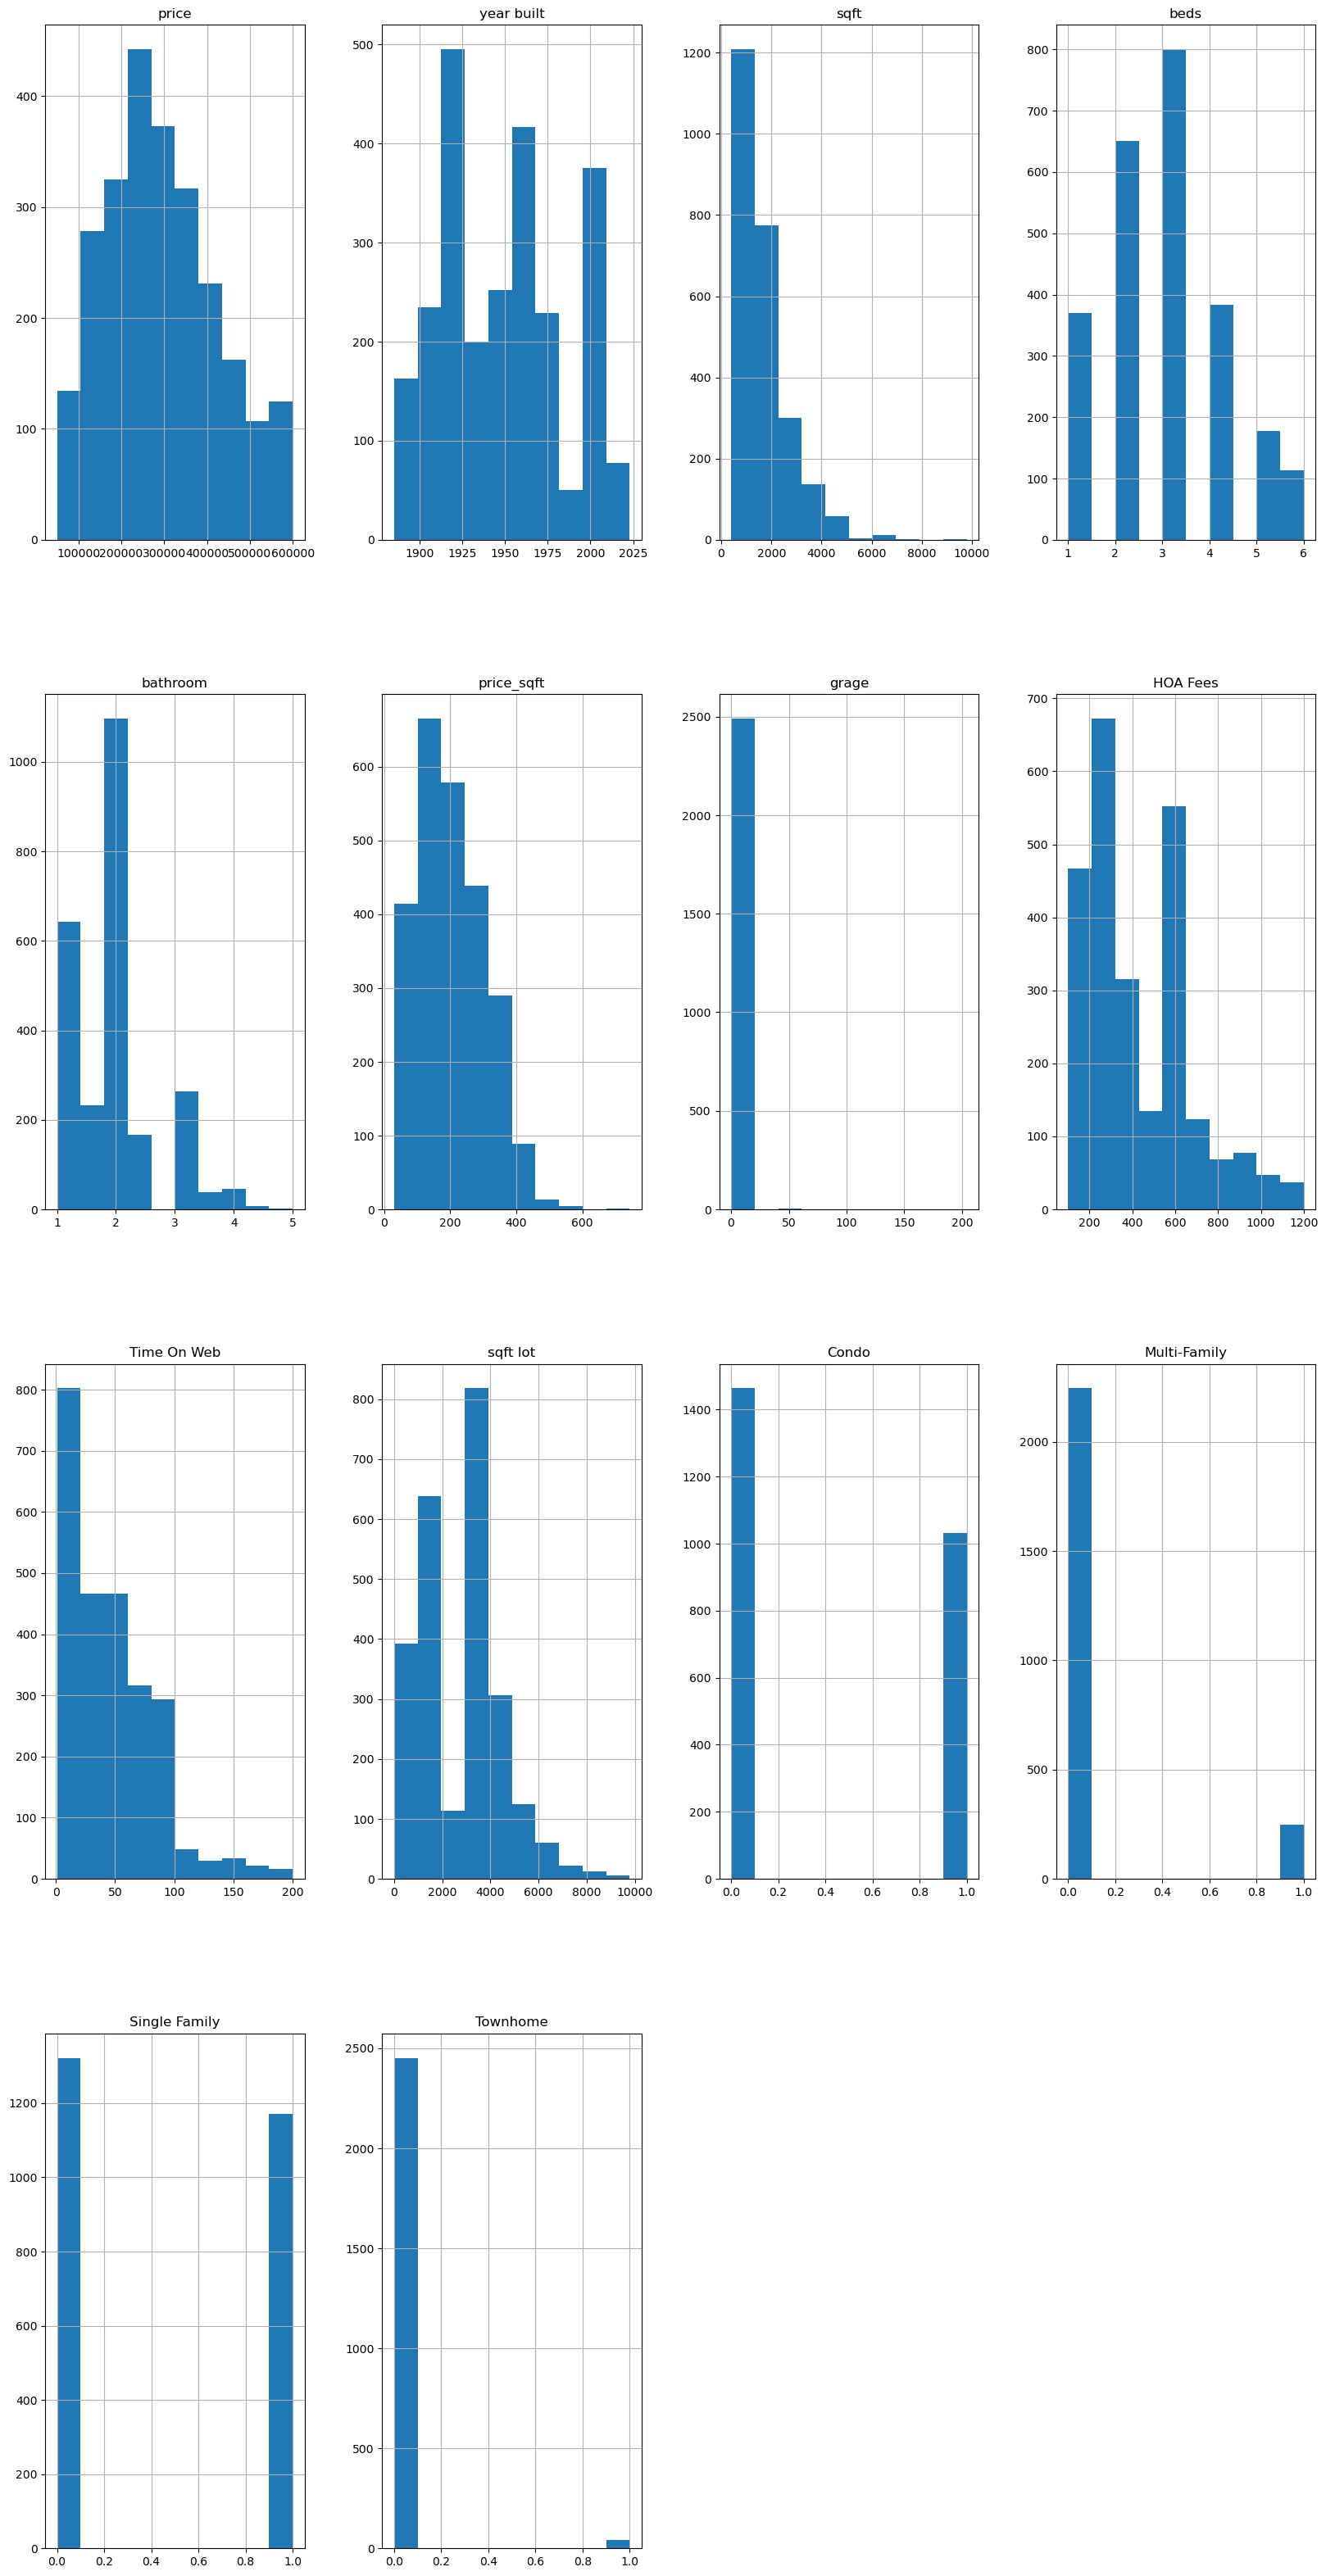

In [17]:
## נייצר שוב את הגרפים כדי לראות האם עדיין קיימים ערכים אשר יחשבו כחריגים 
## ניתן לראות שכעת הערכים מתפלגים בצורה יותר אחידה 
fig, ax = plt.subplots(figsize=(20,40))
df2.hist(ax=ax, figsize=(20,40))

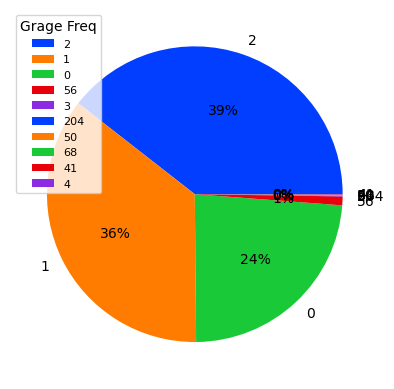

In [19]:
#לא ניתן לראות להבין ברור ע"י הפלוטים את ההתפלגות עבור חניה לכן נבדוק את הערכים ע"י יצירת פאי צארט   
data= df2['grage'].value_counts()
labels=df2['grage'].unique()
colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%1.0f%%')
plt.legend(title="Grage Freq", loc='upper left' , fontsize=8)
plt.show()

In [20]:
df2 = df2[(df2['grage'] >=0) & (df2['grage'] <= 5)]                 

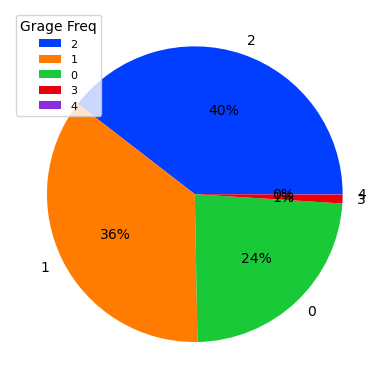

In [21]:
 ## כמו שאמרנו לא ניתן להבין מהציורים את התפלגות החנייה לכן נבצע גרף פאי 
data= df2['grage'].value_counts()
labels=df2['grage'].unique()
colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%1.0f%%')
plt.legend(title="Grage Freq", loc='upper left' , fontsize=8)
plt.show()

In [22]:
df2

,price,year built,sqft,beds,bathroom,price_sqft,grage,HOA Fees,Address,Time On Web,sqft lot,Condo,Multi-Family,Single Family,Townhome
2,249500,1885.0,1512.0,3.0,2.5,165.0,2,205.000000,"1321 S Christiana Ave, Chicago, IL 60623",1,3125.0,0,0,1,0
7,128250,1942.0,1520.0,4.0,2.0,84.0,1,551.138838,"10119 S Saint Lawrence Ave, Chicago, IL 60628",1,3751.0,0,0,1,0
8,79000,1973.0,575.0,1.0,1.0,137.0,0,316.000000,"3001 S Michigan Ave Unit 1606, Chicago, IL 60616",1,575.0,1,0,0,0
9,325000,1925.0,3125.0,6.0,3.0,104.0,2,175.000000,"5028 W Adams St, Chicago, IL 60644",1,3125.0,0,1,0,0
10,275000,1953.0,1893.0,4.0,2.0,145.0,2,551.138838,"639 E 100th St, Chicago, IL 60628",1,3751.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450,120000,1920.0,3750.0,5.0,2.0,32.0,2,551.138838,"10746 S Wabash Ave, Chicago, IL 60628",23,3750.0,0,1,0,0
5451,249900,1905.0,1092.0,3.0,1.0,229.0,2,288.000000,"4516 N Central Ave, Chicago, IL 60630",62,4487.0,0,0,1,0
5452,249900,1908.0,1150.0,1.0,1.0,217.0,0,491.000000,"900 S Wabash Ave Apt 704, Chicago, IL 60605",120,1150.0,1,0,0,0
5454,97950,1944.0,1196.0,3.0,1.5,82.0,0,300.000000,"9942 S Luella Ave, Chicago, IL 60617",96,4961.0,0,0,1,0


In [23]:
# על ידי שיטת ה איי קיו אר sqdt_lot, sqft הורדנו את הערכים החריגים של      

def outlier_detection_iqr(df):
    df2 = df.copy()

    Q1 = np.percentile(df2['sqft'], 25)
    Q3 = np.percentile(df2['sqft'], 75)
    IQR = Q3 - Q1
    df2.loc[(df2['sqft'] < Q1 - 1.5*IQR) | (df2['sqft'] > Q3 + 1.5*IQR),'sqft'] = np.nan
    Q1 = np.percentile(df2['sqft lot'], 25)
    Q3 = np.percentile(df2['sqft lot'], 75)
    IQR = Q3 - Q1
    df2.loc[(df2['sqft lot'] < Q1 - 1.5*IQR) | (df2['sqft lot'] > Q3 + 1.5*IQR),'sqft lot'] = np.nan
            
    return df2

df2 = outlier_detection_iqr(df2)
df2
df2.dropna(inplace = True)

# df2

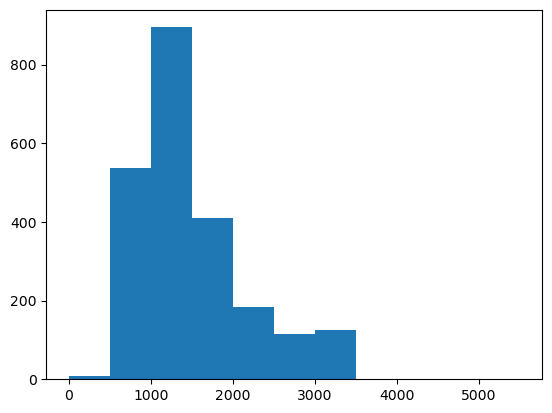

In [24]:
bins = []
for i in range (1,6000,500):
    bins.append(i)

plt.hist(df2['sqft'], bins)
plt.show()

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2273 entries, 2 to 5457
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          2273 non-null   int64  
 1   year built     2273 non-null   float64
 2   sqft           2273 non-null   float64
 3   beds           2273 non-null   float64
 4   bathroom       2273 non-null   float64
 5   price_sqft     2273 non-null   float64
 6   grage          2273 non-null   int64  
 7   HOA Fees       2273 non-null   float64
 8   Address        2273 non-null   object 
 9   Time On Web    2273 non-null   int64  
 10  sqft lot       2273 non-null   float64
 11  Condo          2273 non-null   uint8  
 12  Multi-Family   2273 non-null   uint8  
 13  Single Family  2273 non-null   uint8  
 14  Townhome       2273 non-null   uint8  
dtypes: float64(7), int64(3), object(1), uint8(4)
memory usage: 222.0+ KB


In [26]:
# df2.to_csv('clean-df.csv')